In [ ]:
#### Eugenio Perez Molphe Montoya ####
#### 17.06.2024 ####
#### I add the taxonomic information to the genomes that have iroN, then I create figures to visualize the distribution of the gene in Enterobacteriaceae ####

In [ ]:
# In case that I want to reset the kernel

%reset -f

Necessary for everything

In [ ]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [ ]:
### Read the taxonomic information files ####

pathEnterobacteriaceae = '/mnt/mnemo6/nnaepf/for_eugenio/tax_info_complete.txt'

# This information will be saved as dictionary with the following structure:
# taxonomic identity number : [taxomic identities in the different taxonomic levels]
with open(pathEnterobacteriaceae) as f:
    enterTaxInfoList = f.readlines()

enterTaxInfo = {}
for i in enterTaxInfoList:
    line = i.split('\t')
    enterTaxInfo[line[0]] = line[1].split(';')
    print(enterTaxInfo[line[0]][6])

##### To do: try to get the taxonomic information from left to right, instead of right to left ####

# enterTaxInfo[x][-2] = species level [7]
# enterTaxInfo[x][-3] = genus level [6]

Proportion of IroN in different genera

In [ ]:
#### Read the iroN taxonomy identity numbers file ####
pathEnterobacteriaceae = '/mnt/mnemo5/eugenio/IroN_project/Files/04_Blast_annotations/enterobacteriaceae_all_blast_hits.taxonomy_identity_numbers.txt'

# Read the file and save it as a list of taxonomic identity numbers
with open(pathEnterobacteriaceae) as f:
    iroNtaxInfo = f.readlines()

for i in range(len(iroNtaxInfo)):
    iroNtaxInfo[i] = iroNtaxInfo[i].strip()

# Let's remove the repeated information, some genomes have multiple hits of iroN,
# and that messes up the percentage of genera/sp with iroN
iroNtaxInfo = list(set(iroNtaxInfo))
print(len(iroNtaxInfo))

# Then I can create a new list with the taxonomic information for each genome that has iroN, I'll count the repeated taxa to get how many genomes with iroN are present in each taxon
# And a dictionary: key(taxon) : value(list with two values: genomes iroN with and total genomes)
# Then I can create a bar plot with the taxonomic information

In [ ]:
### Create a list of taxonomic information for the genomes that have iroN,
# the proportion of genomes with iroN per sp and genus and the number of genomes with iroN ####

# The total number of genomes available per sp and genus

# Genus
genusList = []
for i in enterTaxInfo:
    genusList.append(enterTaxInfo[i][6])

countsGenus = {}
for string in genusList:
    if string in countsGenus:
        countsGenus[string] += 1
    else:
        countsGenus[string] = 1

# Species
speciesList = []
for i in enterTaxInfo:
    if enterTaxInfo[i][7]:
        speciesList.append(enterTaxInfo[i][7].strip())
    else:
        speciesList.append(enterTaxInfo[i][-1].strip())

countsSpecies = {}  
for string in speciesList:
    if string in countsSpecies:
        countsSpecies[string] += 1
    else:
        countsSpecies[string] = 1

# Create the list of taxonomic information for the genomes that have iroN
iroNtaxInfoGenus = []
iroNtaxInfoSpecies = []
for i in iroNtaxInfo:
    iroNtaxInfoGenus.append(enterTaxInfo[i][6])
    if enterTaxInfo[i][7]:
        iroNtaxInfoSpecies.append(enterTaxInfo[i][7].strip())
    else:
        iroNtaxInfoSpecies.append(enterTaxInfo[i][-1].strip())

# Count the number of genomes with iroN per sp and genus
countsGenusIroN = {}
for string in iroNtaxInfoGenus:
    if string in countsGenusIroN:
        countsGenusIroN[string] += 1
    else:
        countsGenusIroN[string] = 1

countsSpeciesIroN = {}
for string in iroNtaxInfoSpecies:
    string = string.strip()
    if string in countsSpeciesIroN:
        countsSpeciesIroN[string] += 1
    else:
        countsSpeciesIroN[string] = 1

print(countsGenusIroN)
print(countsSpeciesIroN)

In [ ]:
### The same but for Salmonella ###

# Let's read the list of Salmonella genomes that have iroN
pathSalmonella = '/mnt/mnemo5/eugenio/IroN_project/Files/04_Blast_annotations/salmonella_blasted_sequences.ncbi_codes.txt'

# Read the file and save it as a list of taxonomic identity numbers
with open(pathSalmonella) as f:
    salmonellaTaxInfo = f.readlines()
salmonellaTaxInfo = [i.strip() for i in salmonellaTaxInfo]
print(salmonellaTaxInfo[0:10])

# Now let's read the metadata file with the taxonomy of the Salmonella species
# The path of the metadata file
pathMetadata = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/salmonella_metadata.txt'

# Read the metadata file
with open(pathMetadata, 'r') as f:
    metadata = f.readlines()
metadata.pop(0) # Remove the header (accession,bioproject_accession,species_pg3,genus_pg3,Completeness,Contamination,number_of_contigs)
metadata = [i.strip().split(',') for i in metadata]

# Create a dictionary with the taxonomic information of the Salmonella genomes
salmonellaTaxInfoDict = {}
for i in metadata:
    salmonellaTaxInfoDict[i[0]] = [i[2], i[3]]

# Create a list of taxonomic information for the total Salmonella genomes with Salmonella
speciesListIroN = []
for i in salmonellaTaxInfo:
    speciesListIroN.append(salmonellaTaxInfoDict[i][0])

genusListIroN = []
for i in salmonellaTaxInfo:
    genusListIroN.append(salmonellaTaxInfoDict[i][1])

# And let's count the total number of genomes per sp and genus
salmonellaGenusTotal = []
for i in metadata:
    salmonellaGenusTotal.append(i[3])
salmonellaSpTotal = []
for i in metadata:
    salmonellaSpTotal.append(i[2])

# I'll keep using the dictionaries countsGenus and countsSpecies from the last cell
for string in salmonellaGenusTotal:
    if string in countsGenus:
        countsGenus[string] += 1
    else:
        countsGenus[string] = 1

for string in salmonellaSpTotal:
    if string in countsSpecies:
        countsSpecies[string] += 1
    else:
        countsSpecies[string] = 1

# Count the number of genomes per sp and genus with the same dictionaries countsGenusIroN and countsSpeciesIroN
for string in genusListIroN:
    if string in countsGenusIroN:
        countsGenusIroN[string] += 1
    else:
        countsGenusIroN[string] = 1

for string in speciesListIroN:
    if string in countsSpeciesIroN:
        countsSpeciesIroN[string] += 1
    else:
        countsSpeciesIroN[string] = 1

print(countsGenusIroN)
print(countsSpeciesIroN)

In [ ]:
### Final details for the lists ###

# So 'unclassified Enterobacteriaceae' and 'Enterobacteriaceae incertae sedis' are the same thing, I'll join them
if 'Enterobacteriaceae incertae sedis' in countsGenusIroN:
    countsGenusIroN['unclassified Enterobacteriaceae'] += countsGenusIroN['Enterobacteriaceae incertae sedis']
    del countsGenusIroN['Enterobacteriaceae incertae sedis']

if 'Enterobacteriaceae incertae sedis' in countsGenus:
    countsGenus['unclassified Enterobacteriaceae'] += countsGenus['Enterobacteriaceae incertae sedis']
    del countsGenus['Enterobacteriaceae incertae sedis']

# And let's add the genera that don't have iroN
for i in list(countsGenus.keys()):
    if i not in list(countsGenusIroN.keys()):
        countsGenusIroN[i] = 0

# And let's add the species that don't have iroN
for i in list(countsSpecies.keys()):
    if i not in list(countsSpeciesIroN.keys()):
        countsSpeciesIroN[i] = 0

In [ ]:
#### Now let's get the proportion of genus/sp with iroN
proportionGenusIroN = {}
for i in countsGenusIroN:
    proportionGenusIroN[i] = countsGenusIroN[i] / countsGenus[i] * 100

proportionSpeciesIroN = {}
for i in countsSpeciesIroN:
    proportionSpeciesIroN[i] = countsSpeciesIroN[i] / countsSpecies[i] * 100

# Let's print the results
print(proportionGenusIroN)
print(proportionSpeciesIroN)

In [ ]:
### Let's graph the results ###

# Data for the plot
categories = ['unclassified Enterobacteriaceae', 'Rahnella', 'Serratia', 'Yersinia', 'Cedecea', 'Cronobacter', 'Kosakonia', 'Leclercia', 'Enterobacter', 
              'Lelliottia', 'Pluralibacter', 'Klebsiella/Raoultella group', 'Kluyvera', 'Citrobacter', 'Salmonella', 'Shigella', 'Escherichia']
percentages = [proportionGenusIroN[i] for i in categories]

# Create the horizontal bar plot
plt.barh(categories, percentages, color='#C71C3B')

# Set the labels and title
plt.xlabel('Proportion (%)')
plt.ylabel('Genus')
plt.title('Proportion of Genus with iroN')

# Display the plot
plt.show()

In [ ]:
### Let's save the results ###

# Data for the pandas dataframe
dataGenus = {'Genus': list(countsGenus.keys()), 'Total genomes': list(countsGenus.values()), 'Genomes with iroN': list(countsGenusIroN.values()), 'Proportion (%)': list(proportionGenusIroN.values())}
dataSpecies = {'Species': list(countsSpecies.keys()), 'Total genomes': list(countsSpecies.values()), 'Genomes with iroN': list(countsSpeciesIroN.values()), 'Proportion (%)': list(proportionSpeciesIroN.values())}

# Create the pandas dataframes
dfGenus = pd.DataFrame(dataGenus)
dfSpecies = pd.DataFrame(dataSpecies)

# Save the dataframes as csv files
pathGenus = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Genus_iroN_proportion.csv'
pathSp = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Species_iroN_proportion.csv'

dfGenus.to_csv(pathGenus, index=False)
dfSpecies.to_csv(pathSp, index=False)

I'll do the heatmap of the promoters

In [9]:
# Now let's read the metadata file with the taxonomy of the Salmonella species
# The path of the metadata file
pathMetadata = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/salmonella_metadata.txt'

# Read the metadata file
with open(pathMetadata, 'r') as f:
    metadata = f.readlines()
metadata.pop(0) # Remove the header (accession,bioproject_accession,species_pg3,genus_pg3,Completeness,Contamination,number_of_contigs)
metadata = [i.strip().split(',') for i in metadata]

# Create a dictionary with the taxonomic information of the Salmonella genomes
salmonellaTaxInfoDict = {}
for i in metadata:
    salmonellaTaxInfoDict[i[0]] = [i[2], i[3]]

In [18]:
enteroPath = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/enterobacteriaceae_matrix_closest_TSS.tsv'
salmoPath = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/salmonella_matrix_closest_TSS.tsv'

# Let's read the dataframes
dfEntero = pd.read_csv(enteroPath, sep='\t')
dfSalmo = pd.read_csv(salmoPath, sep='\t')

# Let's change the name of the column with the genome names
dfEntero = dfEntero.rename(columns={'Unnamed: 0' : 'Genome'})
dfSalmo = dfSalmo.rename(columns={'Unnamed: 0' : 'Genome'})

dfEntero['Genome'] = dfEntero['Genome'].astype(str)

# Let's replace the genome codes with sp names, I need the dictionary enterTaxInfo
for i in enterTaxInfo:
    dfEntero = dfEntero.replace(i, enterTaxInfo[i][7].strip())

print(dfEntero)

                          Genome  arcA  argR2  deoR  fis  lrp  metR  rpoD16  \
0          Citrobacter europaeus     0      0     1    0    0     0       0   
1             Salmonella bongori     0      1     0    0    0     0       0   
2             Salmonella bongori     0      1     0    0    0     0       0   
3   Citrobacter freundii complex     0      0     1    0    0     0       0   
4            Salmonella enterica     0      1     0    0    0     0       0   
5   Citrobacter freundii complex     0      0     1    0    0     0       0   
6            Salmonella enterica     0      1     0    0    0     0       0   
7       Enterobacter bugandensis     0      0     0    0    1     0       0   
8             Salmonella bongori     0      1     0    0    0     0       0   
9   Enterobacter cloacae complex     0      0     0    0    0     0       1   
10                    Klebsiella     1      0     0    0    0     0       0   
11            Salmonella bongori     0      1     0 

In [19]:
# Let's do the same for Salmonella
pathNCBIcodes = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Salmonella_header_NCBIcode.csv'

# Create the dictionary with the NCBI codes
with open(pathNCBIcodes, 'r') as f:
    lines = f.readlines()
    headerToNCBIcodeSalmo = {}
    for line in lines:
        line = line.strip().split(',')
        headerToNCBIcodeSalmo[line[0]] = line[1]

# Now let's replace the genome codes with the NCBI taxonomic codes
dfSalmo['Genome'] = dfSalmo['Genome'].astype(str) + ".1"
for i in headerToNCBIcodeSalmo:
    dfSalmo = dfSalmo.replace(i, headerToNCBIcodeSalmo[i])

for i in salmonellaTaxInfoDict:
    dfSalmo = dfSalmo.replace(i, salmonellaTaxInfoDict[i][0])
print(dfSalmo)

                   Genome  argR2  fis  rpoD17
0     Salmonella enterica      0    0       1
1     Salmonella enterica      0    0       1
2     Salmonella enterica      0    1       0
3     Salmonella enterica      0    0       1
4     Salmonella enterica      0    0       1
...                   ...    ...  ...     ...
1180  Salmonella enterica      0    0       1
1181  Salmonella enterica      0    0       1
1182  Salmonella enterica      0    0       1
1183  Salmonella enterica      0    0       1
1184  Salmonella enterica      0    0       1

[1185 rows x 4 columns]


In [ ]:
##### Create a dataframe of Salmonella enterica genomes with iroN ####

salmonellaInEnteroDF = dfEntero['Genome'] == 'Salmonella enterica'
genomesToAdd = dfEntero[salmonellaInEnteroDF]

dfSalmo = pd.concat([dfSalmo, genomesToAdd], ignore_index=True)

# Then let's remove the genomes that are not Salmonella enterica, i.e. Salmonella bongori
dfSalmo.drop(dfSalmo[dfSalmo['Genome'] == 'Salmonella bongori'].index, inplace=True)

# Let's fill the NaN values with 0
for col in dfSalmo.columns:
    if col != 'Genome':
        dfSalmo[col] = dfSalmo[col].fillna(0).astype(int)

# Remove the columns with only zeroes
dfSalmo = dfSalmo.loc[:, (dfSalmo != 0).any(axis=0)]

print(dfSalmo)

In [ ]:
##### Create a df that contains all Salmonella genomes with iroN ####
genusOfInterest = 'Salmonella'
dfFiltered = dfEntero[dfEntero['Genome'].str.contains(genusOfInterest)]

dfSalmo = pd.concat([dfSalmo, dfFiltered], ignore_index=True)

# Let's fill the NaN values with 0
for col in dfSalmo.columns:
    if col != 'Genome':
        dfSalmo[col] = dfSalmo[col].fillna(0).astype(int)

dfSalmo = dfSalmo.loc[:, (dfSalmo != 0).any(axis=0)]

print(dfSalmo)

In [20]:
##### Create a dataframe with proportions of genomes with iroN per genera ####

# Let's correct a Salmonella that escaped the renaming
dfSalmo = dfSalmo.replace('CP033348.1', 'Salmonella enterica')

# First of all, I'll create a df that contains all the genomes, and then get only the genera as rows
dfAll = pd.concat([dfEntero, dfSalmo], ignore_index=True)
dfAll['Genome'] = dfAll['Genome'].str.split().str[0]

# Let's remove the NaNs and force everyone to be an integer
for col in dfAll.columns:
    if col != 'Genome':
        dfAll[col] = dfAll[col].fillna(0).astype(int)

dfMergedByGenera = dfAll.groupby('Genome', as_index=False).sum()

# Let's create a dictionary that counts the ocurrences of a genus in the df
generaCounts = dfAll['Genome'].value_counts()
dfMergedByGenera['Total genomes'] = [generaCounts[i] for i in dfMergedByGenera['Genome']]

# Time to get the proportion of genomes with certain promoter
for col in dfMergedByGenera.columns[1:]:
    if col != 'Total genomes':
        dfMergedByGenera[col] = dfMergedByGenera[col] / dfMergedByGenera['Total genomes'] * 100

# Delete the column total genomes
dfMergedByGenera = dfMergedByGenera.drop(columns=['Total genomes'])

print(dfMergedByGenera)

         Genome   arcA     argR2   deoR         fis   lrp   metR  rpoD16  \
0   Citrobacter    0.0  0.000000  100.0    0.000000   0.0    0.0     0.0   
1  Enterobacter    0.0  0.000000    0.0    0.000000  50.0    0.0    50.0   
2    Klebsiella  100.0  0.000000    0.0    0.000000   0.0    0.0     0.0   
3     Kosakonia    0.0  0.000000    0.0    0.000000   0.0    0.0     0.0   
4    Salmonella    0.0  1.086957    0.0    7.525084   0.0    0.0     0.0   
5      Shigella    0.0  0.000000    0.0  100.000000   0.0    0.0     0.0   
6  unclassified    0.0  0.000000    0.0    0.000000   0.0  100.0     0.0   

      rpoD17  
0    0.00000  
1    0.00000  
2    0.00000  
3  100.00000  
4   91.38796  
5    0.00000  
6    0.00000  


/tmp/ipykernel_591570/3113348667.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = annot.applymap(lambda x: f'{x:.2f}' if pd.notnull(x) else '')


<Figure size 1000x1000 with 0 Axes>

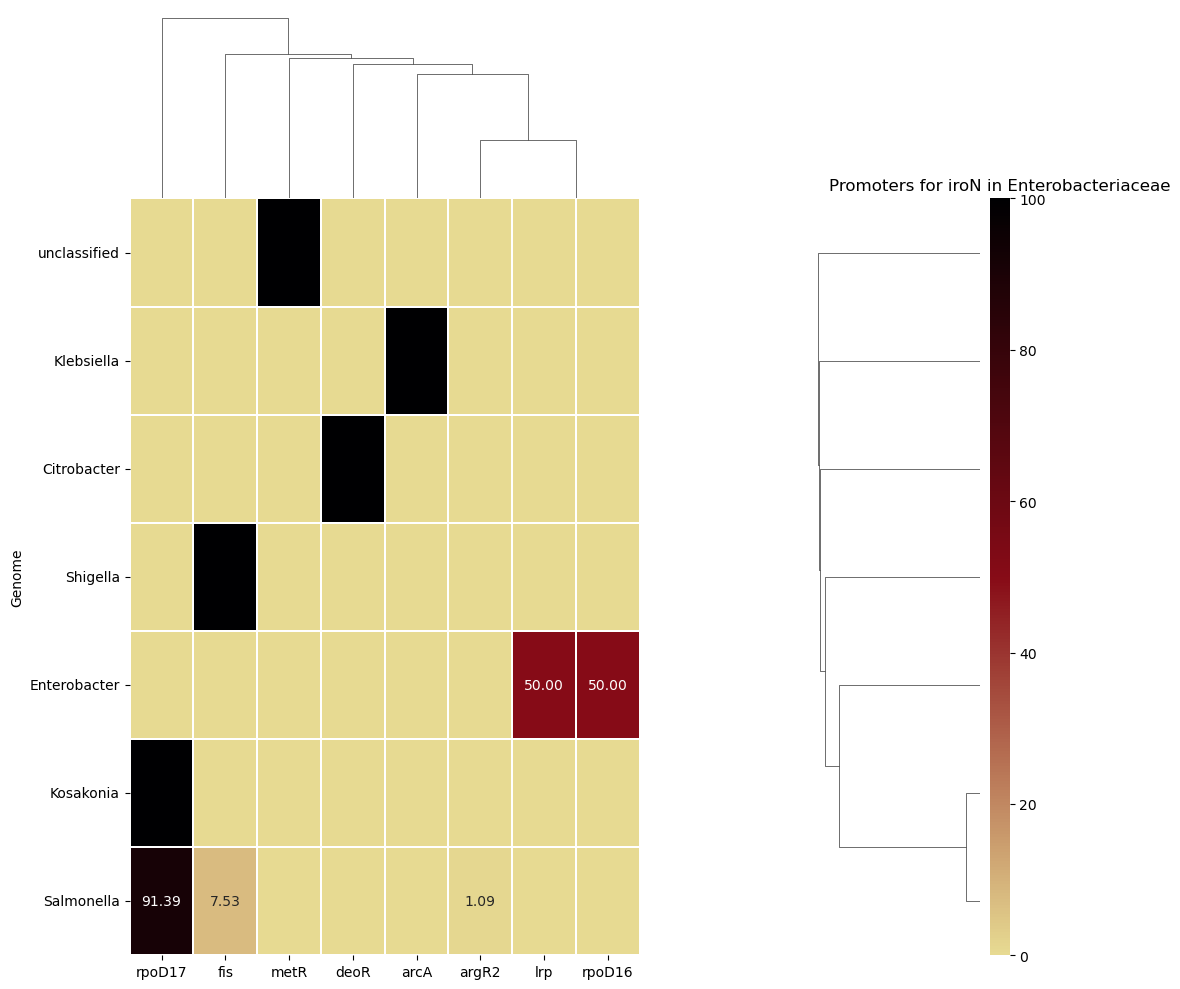

"\nClustermap parameters:\nmethod: 'average'\nmetric: 'euclidean'\nstandard_scale: None (no standard scaling)\nz_score: None (no z-score normalization)\n"

In [22]:
#filtered_df = dfSalmo[(dfSalmo['argR'] == 2) | (dfSalmo['argR2'] == 2)]
#sorted_df = filtered_df.sort_values(by='argR', ascending=False)
df_pivot = dfMergedByGenera.set_index('Genome')

# Create a color palette based on the results of a HE agar
cmap = LinearSegmentedColormap.from_list('mycmap', ['#E7DA92', '#870B17', '#000002'])

# Show me the number when it's not zero
maskLow = df_pivot != 0
maskHigh = df_pivot < 100
annot = df_pivot.where(maskLow & maskHigh, other=np.nan)
annot = annot.applymap(lambda x: f'{x:.2f}' if pd.notnull(x) else '')

# Create the heatmap
plt.figure(figsize=(10, 10))
g = sns.clustermap(df_pivot, cmap=cmap, annot=annot, fmt='', cbar=True, linewidths=0.1, linecolor='white', xticklabels=True, yticklabels=True)

# Get the positions of the original axes
heatmap_ax = g.ax_heatmap
row_dendro_ax = g.ax_row_dendrogram
col_dendro_ax = g.ax_col_dendrogram
cbar_ax = g.cax

# Adjust the positions
heatmap_pos = heatmap_ax.get_position()
row_dendro_pos = row_dendro_ax.get_position()
col_dendro_pos = col_dendro_ax.get_position()
cbar_pos = cbar_ax.get_position()

# Move the row dendrogram to the right
row_dendro_ax.set_position([heatmap_pos.x1, heatmap_pos.y0, row_dendro_pos.width, heatmap_pos.height])
heatmap_ax.set_position([heatmap_pos.x0, heatmap_pos.y0, heatmap_pos.width - row_dendro_pos.width, heatmap_pos.height])
col_dendro_ax.set_position([heatmap_pos.x0, col_dendro_pos.y0, heatmap_pos.width - row_dendro_pos.width, col_dendro_pos.height])

# Move the colorbar to the right
cbar_width = 0.02
cbar_ax.set_position([heatmap_pos.x1 + row_dendro_pos.width + 0.01, heatmap_pos.y0, cbar_width, heatmap_pos.height])

# Move y-labels to the left
heatmap_ax.yaxis.set_label_position("left")
heatmap_ax.yaxis.tick_left()

# Restore the vertical dendrogram
row_dendro_ax.set_visible(True)


# Customize the heatmap (optional)
plt.title('Promoters for iroN in Enterobacteriaceae')

# Remove y-labels
#heatmap_ax.set_yticklabels([])


# Show the plot
plt.show()

'''
Clustermap parameters:
method: 'average'
metric: 'euclidean'
standard_scale: None (no standard scaling)
z_score: None (no z-score normalization)
'''

In [ ]:
# Out of curiosity, let's see the genomes that have argR
filtered_df = dfSalmo[(dfSalmo['argR'] == 2) | (dfSalmo['argR2'] == 2)]
salmonellaWArgR = filtered_df['Genome'].tolist()
print(len(salmonellaWArgR))

# Save the genomes that have argR
pathSalmonellaWargR = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/salmonella_genomes_with_argR.txt'
with open(pathSalmonellaWargR, 'w') as f:
    for i in salmonellaWArgR:
        f.write(i + '\n')